In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook
import seaborn as sns
import os
import pickle

### NOTE - 
Run the following code only once at the starting of the project 

In [ ]:
# Importing and saving the data
def save():
    # Move to the main directory of the project
    #os.chdir("..")
    file_path = os.path.abspath(os.curdir)
    file_path_data = os.path.join(file_path, 'data/') # file path containing the dataset
    file_names = os.listdir(file_path_data) # dataset file names
    print('Reading from', file_path_data)

    # Creating the data frames of the data present
    print('Creating dataframes...')
    customer_data = pd.read_excel(os.path.join(file_patclh_data, file_names[0]))
    final_invoice = pd.read_csv(os.path.join(file_path_data, file_names[1]))
    jtd = pd.read_csv(os.path.join(file_path_data, file_names[2]))
    plant_master = pd.read_excel(os.path.join(file_path_data, file_names[4]))

    # Saving the pickle files of the dataframes for fast importing of the data
    print('Saving the pickled files...')
    customer_data.to_pickle(os.path.join(file_path , r'pickled\customer_data.pkl'))
    final_invoice.to_pickle(os.path.join(file_path , r'pickled\final_invoice.pkl'))
    jtd.to_pickle(os.path.join(file_path , r'pickled\jtd.pkl'))
    plant_master.to_pickle(os.path.join(file_path , r'pickled\plant_master.pkl'))

save()

In [2]:
# Loading the pickled data
customer_data = pd.read_pickle(r'pickled\customer_data.pkl')
final_invoice = pd.read_pickle(r'pickled\final_invoice.pkl')
jtd = pd.read_pickle(r'pickled\jtd.pkl')
plant_master = pd.read_pickle(r'pickled/plant_master.pkl')

In [3]:
top_50_model = final_invoice[['Customer No.', 'Model']]

In [4]:
grouped_top_50_model = top_50_model.groupby('Model').count()
grouped_top_50_model.columns = ['No. of Cars']
sorted_top_50_model = grouped_top_50_model.sort_values('No. of Cars', ascending=False)

In [5]:
sorted_top_50_model.reset_index(inplace=True)
temp0= sorted_top_50_model.loc[:50]

<IPython.core.display.Javascript object>


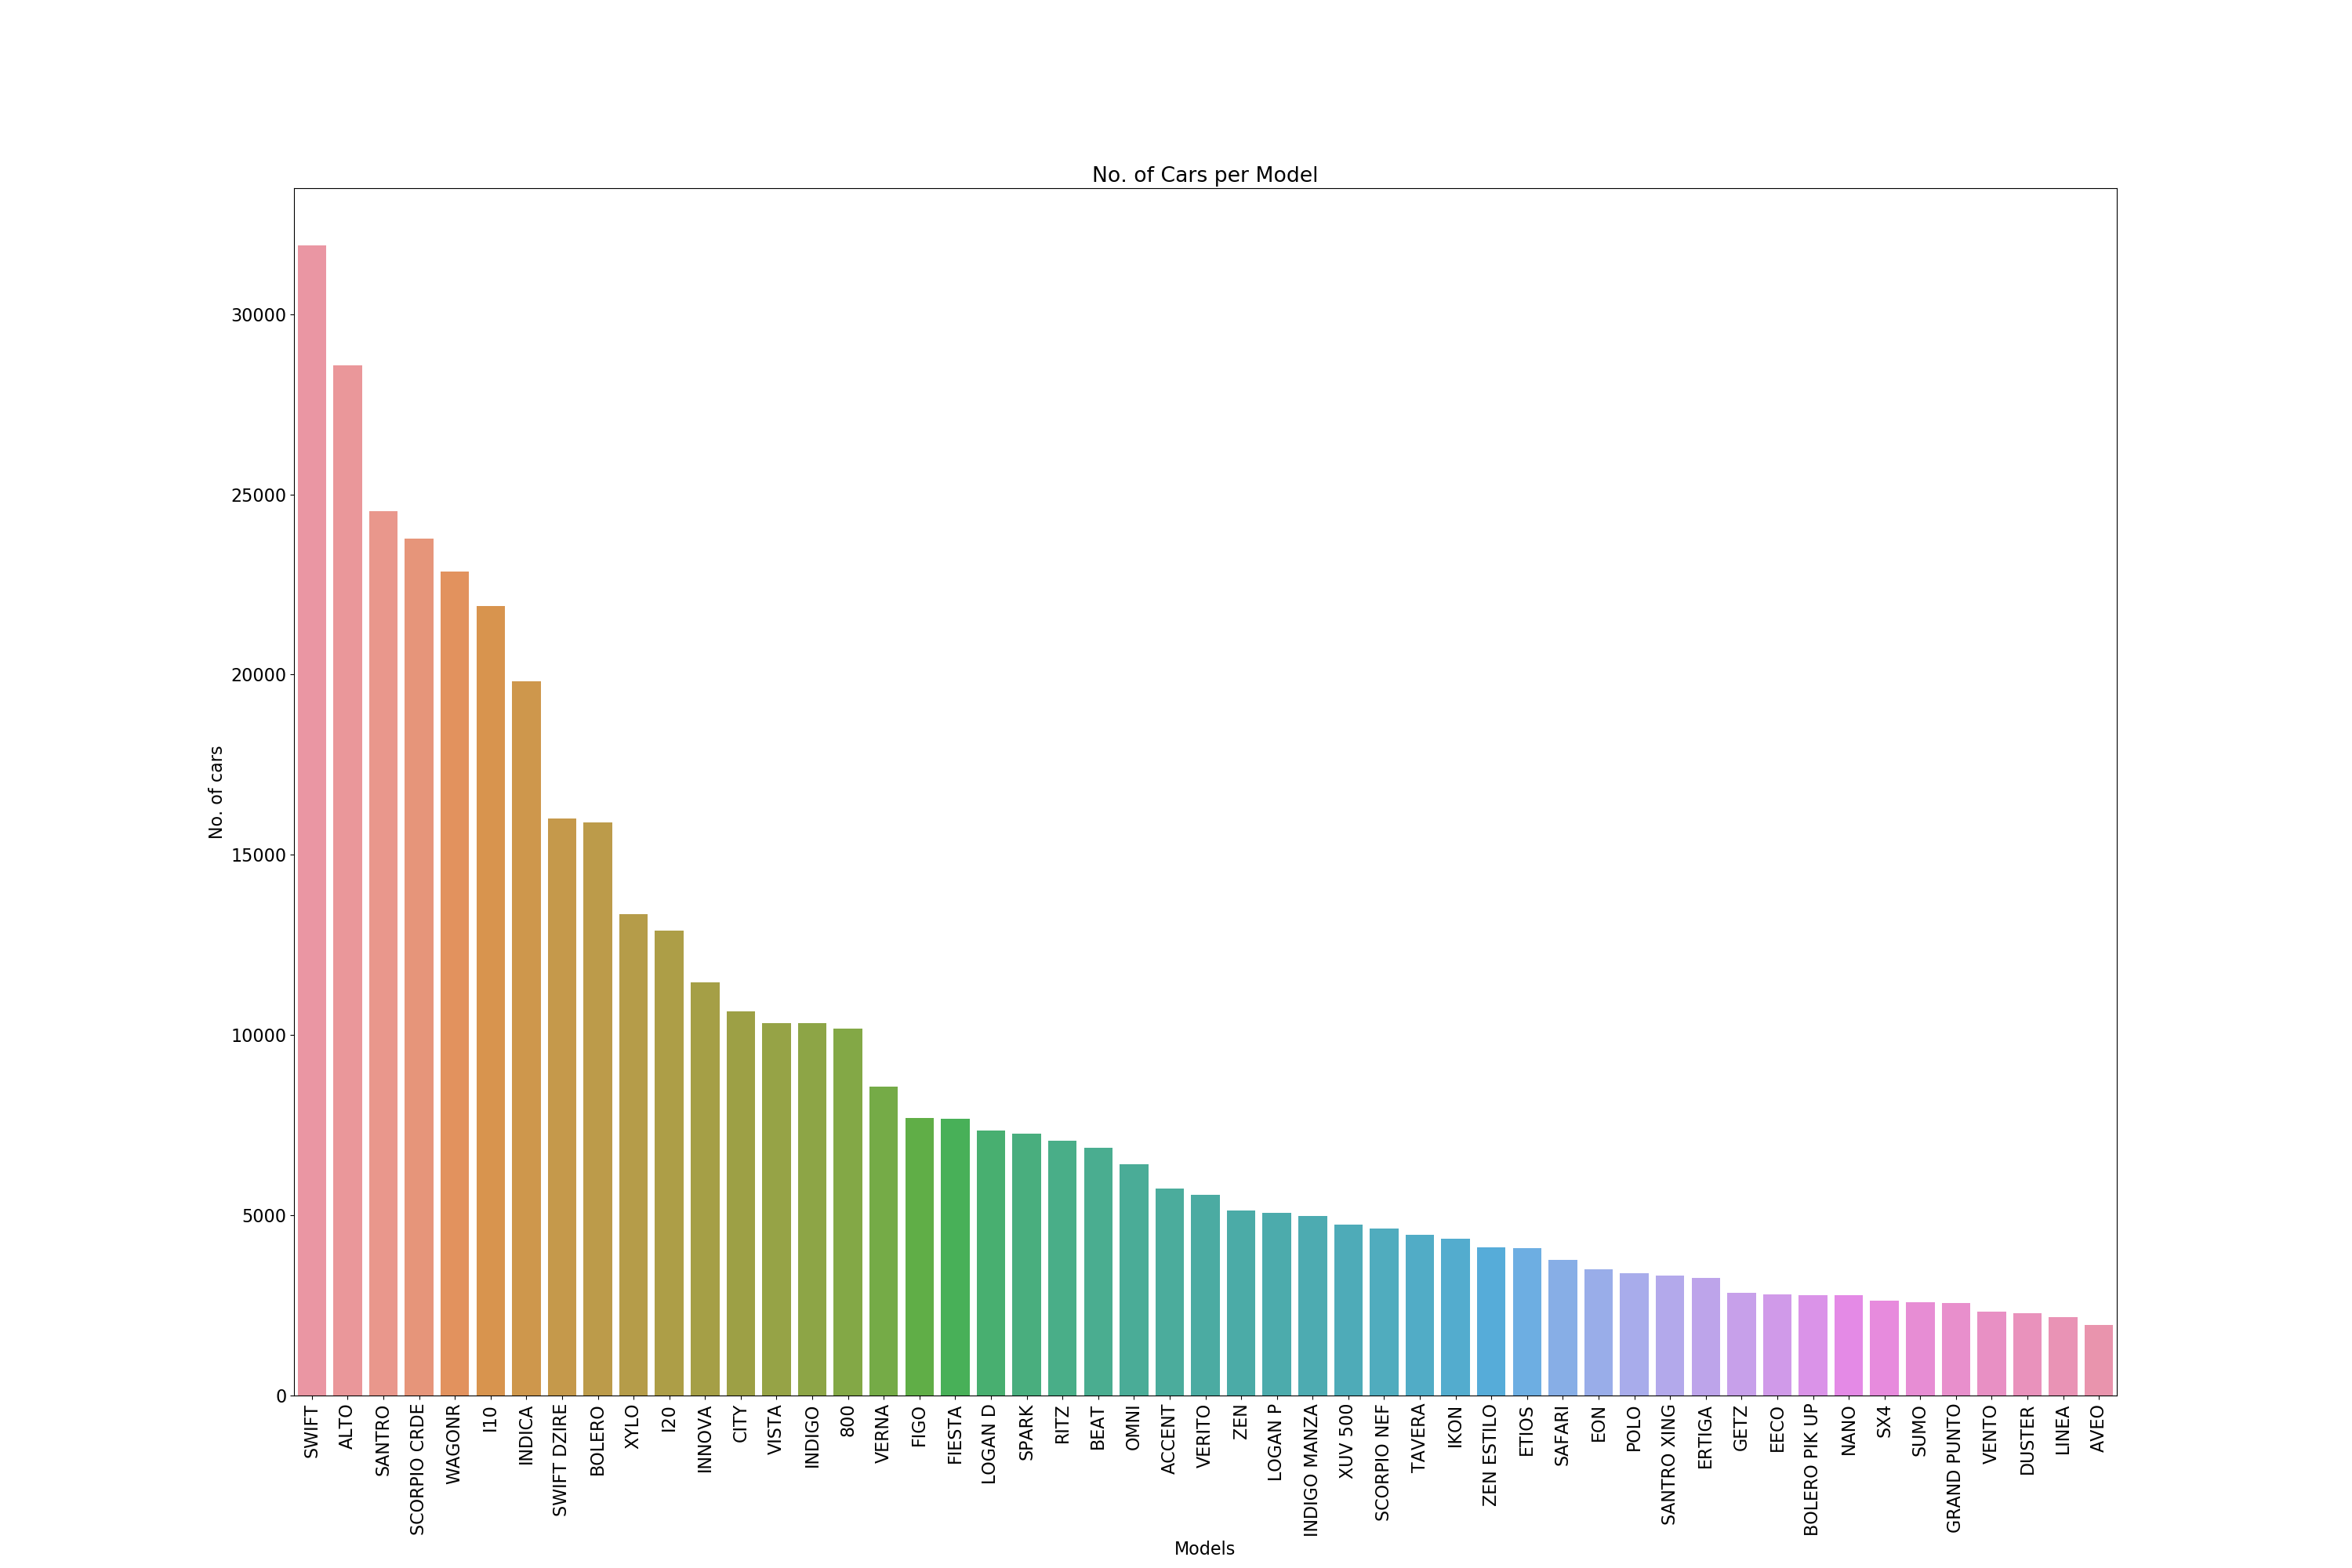

In [11]:
fig, ax = plt.subplots(figsize=[30, 20])
sns.barplot(x="Model", y="No. of Cars", data=temp0, ax=ax)
ax.set_title("No. of Cars per Model")
ax.set_xlabel("Models")
ax.set_ylabel("No. of cars")
plt.xticks(rotation=90)
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.rcParams.update({'font.size': 16})
plt.savefig(r'images/top_50_model.png')